In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from typhon.arts import xml
from typhon.plots import profile_p, styles
from typhon.physics import vmr2relative_humidity, frequency2wavenumber, wavenumber2frequency
plt.style.use(styles.get('typhon'))

# Load simulated observations, the underlying atm_fields and the retrieval quantities

In [25]:
# atm_fields on which the observation is based
atm_fields = xml.load("/scratch/uni/u237/users/mprange/phd/iasi_retrieval/iasi_obs_simulation/atm_fields.xml")
p_grid = atm_fields[0].grids[1]
iasi_obs = xml.load("/scratch/uni/u237/users/mprange/phd/iasi_retrieval/iasi_obs_simulation/iasi_obs_garand_1to5.xml")
f_grid = xml.load("/scratch/uni/u237/users/mprange/phd/iasi_retrieval/sensor_specs/IASI/f_backend.xml")
k_grid = frequency2wavenumber(f_grid)
# Retrieval quantities
a_priori_cov_H2O = xml.load("a_priori/covariance_H2O, H2O-SelfContCKDMT252, H2O-ForeignContCKDMT252.xml")
retrieved_vmr = xml.load(
    "/scratch/uni/u237/users/mprange/phd/iasi_retrieval/testing/vmr_retrieved.xml")
retrieved_T = xml.load(
    "/scratch/uni/u237/users/mprange/phd/iasi_retrieval/testing/T_retrieved.xml")
apriori_vmr = xml.load(
    "/scratch/uni/u237/users/mprange/phd/iasi_retrieval/testing/vmr_apriori.xml")
apriori_T = xml.load(
    "/scratch/uni/u237/users/mprange/phd/iasi_retrieval/testing/T_apriori.xml")
retrieved_y = xml.load(
    "/scratch/uni/u237/users/mprange/phd/iasi_retrieval/testing/y_retrieved.xml")
retrieved_jacobian = xml.load(
    "/scratch/uni/u237/users/mprange/phd/iasi_retrieval/testing/jacobian_retrieved.xml")

In [4]:
len(f_grid)

1440

# Plot difference of retrieved - observed spectra

Text(0.5, 1.0, 'retrieved - observed')

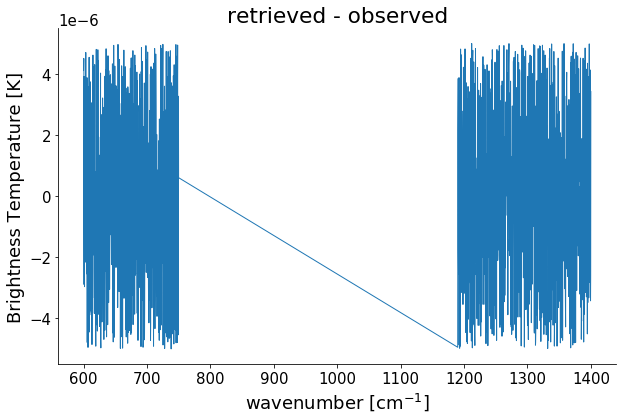

In [23]:
plt.plot(k_grid / 1e2, retrieved_y - iasi_obs[0], linewidth=1.0)
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("Brightness Temperature [K]")
plt.title("retrieved - observed")

# Plot covariance matrices

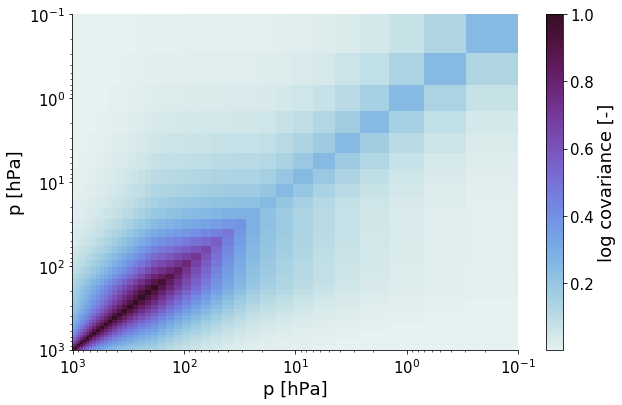

In [21]:
fig, ax = plt.subplots()
mesh = ax.pcolormesh(p_grid / 100, p_grid / 100,
              a_priori_cov_H2O,
              cmap="density",
              #norm=MidpointNormalize(midpoint=0),
              )
ax.set_yscale("log")
ax.set_xscale("log")
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xlabel("p [hPa]")
ax.set_ylabel("p [hPa]")
fig.colorbar(mesh, label="log covariance [-]")

# Plot a priori and retrieved profiles

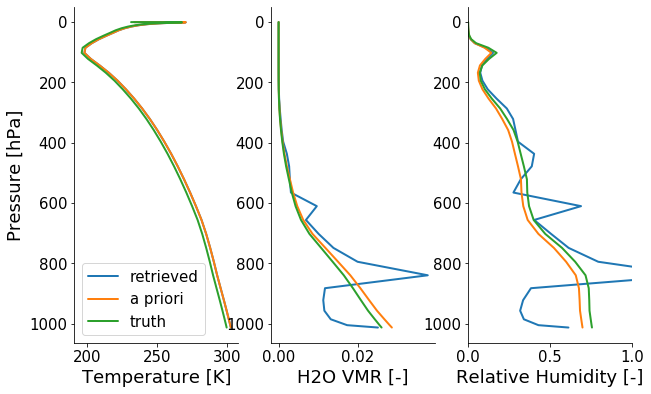

In [26]:
fig, axs = plt.subplots(ncols=3, sharey=False)

def plot_retrieval_profiles(p_grid, true_atm_fields, a_priori_T, a_priori_vmr, retrieved_T, retrieved_vmr):

    profile_p(p_grid, retrieved_T[:,0,0], ax=axs[0], label="retrieved") # Temperature
    profile_p(p_grid, retrieved_vmr[0,:,0,0], ax=axs[1]) # H2O VMR
    RH = vmr2relative_humidity(retrieved_vmr[0,:,0,0], 
                               p_grid, 
                               retrieved_T[:,0,0])
    profile_p(p_grid, RH, ax=axs[2]) # Relative Humidity

    profile_p(p_grid, a_priori_T[:,0,0], ax=axs[0], label="a priori") # Temperature
    profile_p(p_grid, a_priori_vmr[0,:,0,0], ax=axs[1]) # H2O VMR
    RH = vmr2relative_humidity(a_priori_vmr[0,:,0,0], 
                               p_grid, 
                               a_priori_T[:,0,0])
    profile_p(p_grid, RH, ax=axs[2]) # Relative Humidity

    profile_p(p_grid, true_atm_fields[0][:,0,0], ax=axs[0], label="truth") # Temperature
    profile_p(p_grid, true_atm_fields[2][:,0,0], ax=axs[1]) # H2O VMR
    RH = vmr2relative_humidity(true_atm_fields[2][:,0,0], 
                               p_grid, 
                               true_atm_fields[0][:,0,0])
    profile_p(p_grid, RH, ax=axs[2]) # Relative Humidity

    axs[0].legend()
    axs[0].set_xlabel("Temperature [K]")
    axs[1].set_xlabel("H2O VMR [-]")
    axs[2].set_xlabel("Relative Humidity [-]")
    axs[2].set_xlim([0, 1])
    
plot_retrieval_profiles(atm_fields[0].grids[1], atm_fields[0], apriori_T, apriori_vmr, retrieved_T, retrieved_vmr)
plt.savefig("spike_in_retrieved_VMR.pdf")

In [13]:
retrieved_jacobian.T.shape

(43, 1440)

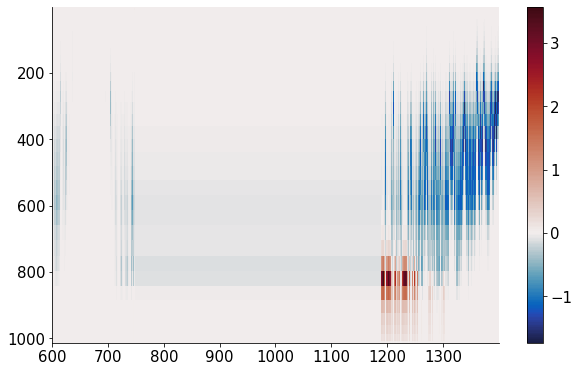

In [28]:
fig, ax = plt.subplots()
mesh = ax.pcolormesh(k_grid/100, atm_fields[0].grids[1]/100,
              retrieved_jacobian.T[:,:],
              cmap="difference",
              norm=MidpointNormalize(midpoint=0),
              )
ax.invert_yaxis()
fig.colorbar(mesh)

In [19]:
retrieved_jacobian.max()

3.5717889